In [11]:
import datetime
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [12]:
def adf_test(timeseries):
    result = adfuller(timeseries)
    statics = result[0]
    p_val = result[1]
    return statics,p_val

In [13]:
def kpss_test(timeseries):
    result = kpss(timeseries)
    statics = result[0]
    p_val = result[1]
    return statics , p_val

In [14]:
df = pd.read_csv('금리인상기간_대주주.csv',index_col = 0)

In [15]:
df = df.loc[:,['코람코라이프인프라리츠','코람코더원리츠']]

코람코라이프인프라리츠 adf_p_val: 0.000, kpss_result: 0.025 -> 비정상성
코람코더원리츠 adf_p_val: 0.262, kpss_result: 0.100 -> 비정상성


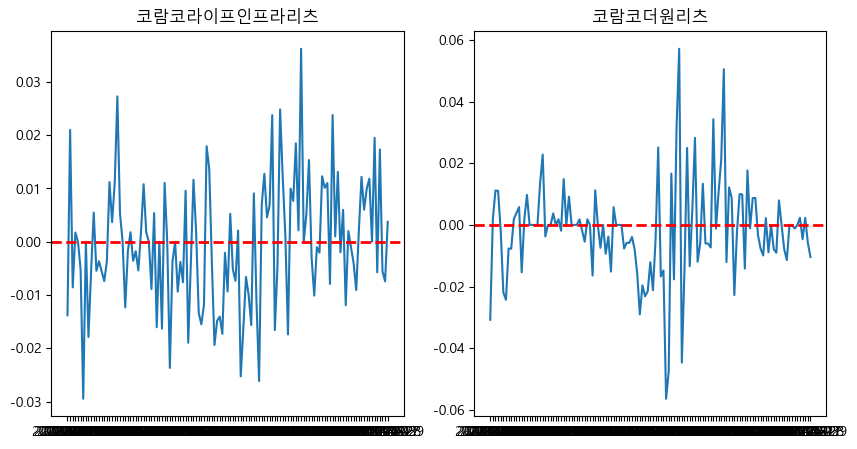

In [19]:
fig = plt.figure(figsize = (10,5))
for i in range(len(df.columns)):
    ax = fig.add_subplot(1,2,i+1)
    ax.plot(df.iloc[:,i])
    ax.set_title(df.columns[i])
    ax.axhline(0, 0, 200, color='red', linestyle='--', linewidth=2)
    a_result = adf_test(df.iloc[:,i])[1]
    k_result = kpss_test(df.iloc[:,i])[1]
    if (a_result < 0.05) and (k_result > 0.05) :
        print(f"{df.columns[i]} adf_p_val: {a_result:.3f}, kpss_result: {k_result:.3f} -> 정상성")
    elif (a_result > 0.05) or (k_result < 0.05) :
        print(f"{df.columns[i]} adf_p_val: {a_result:.3f}, kpss_result: {k_result:.3f} -> 비정상성")
    
plt.show()

In [23]:
df = df.diff().dropna()

코람코라이프인프라리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
코람코더원리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성


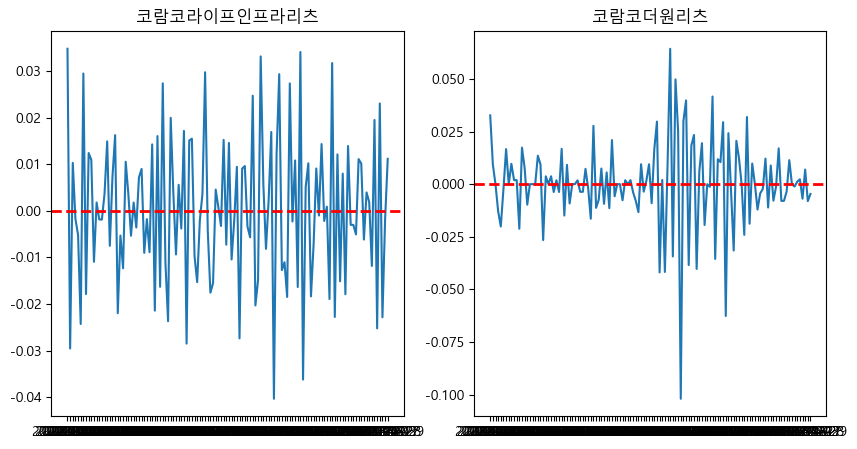

In [24]:
fig = plt.figure(figsize = (10,5))
for i in range(len(df.columns)):
    ax = fig.add_subplot(1,2,i+1)
    ax.plot(df.iloc[:,i])
    ax.set_title(df.columns[i])
    ax.axhline(0, 0, 200, color='red', linestyle='--', linewidth=2)
    a_result = adf_test(df.iloc[:,i])[1]
    k_result = kpss_test(df.iloc[:,i])[1]
    if (a_result < 0.05) and (k_result > 0.05) :
        print(f"{df.columns[i]} adf_p_val: {a_result:.3f}, kpss_result: {k_result:.3f} -> 정상성")
    elif (a_result > 0.05) or (k_result < 0.05) :
        print(f"{df.columns[i]} adf_p_val: {a_result:.3f}, kpss_result: {k_result:.3f} -> 비정상성")
    
plt.show()

In [25]:
df.to_csv('금리인상기간_대주주_정상성.csv')